In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv('./dataset/full_dataset.csv')
df.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."


<AxesSubplot: xlabel='source', ylabel='count'>

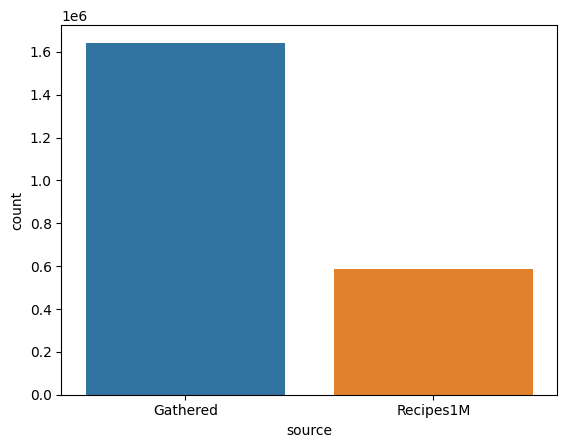

In [3]:
sns.countplot(df, x = 'source')

In [4]:
ingredients = df['ingredients']
ingredients

0          ["1 c. firmly packed brown sugar", "1/2 c. eva...
1          ["1 small jar chipped beef, cut up", "4 boned ...
2          ["2 (16 oz.) pkg. frozen corn", "1 (8 oz.) pkg...
3          ["1 large whole chicken", "2 (10 1/2 oz.) cans...
4          ["1 c. peanut butter", "3/4 c. graham cracker ...
                                 ...                        
2231137    ["1/2 cup chocolate hazelnut spread (recommend...
2231138    ["1 dozen eggs", "1 paprika", "1 salt and pepp...
2231139    ["150 grams Daikon radish", "1 tbsp Sesame oil...
2231140    ["1 cup apple cider", "6 tablespoons sugar", "...
2231141    ["1 pound ground veal", "1/2 pound sweet Itali...
Name: ingredients, Length: 2231142, dtype: object

In [5]:
df['ingredients_length'] = df['ingredients'].map(lambda x: len(ast.literal_eval(x)))
df.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER,ingredients_length
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu...",6
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom...",4
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar...",6
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo...",5
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu...",5


In [6]:
sns.set(rc={'figure.figsize':(20.7,8.27)})

Text(0.5, 1.0, 'Length of ingredients')

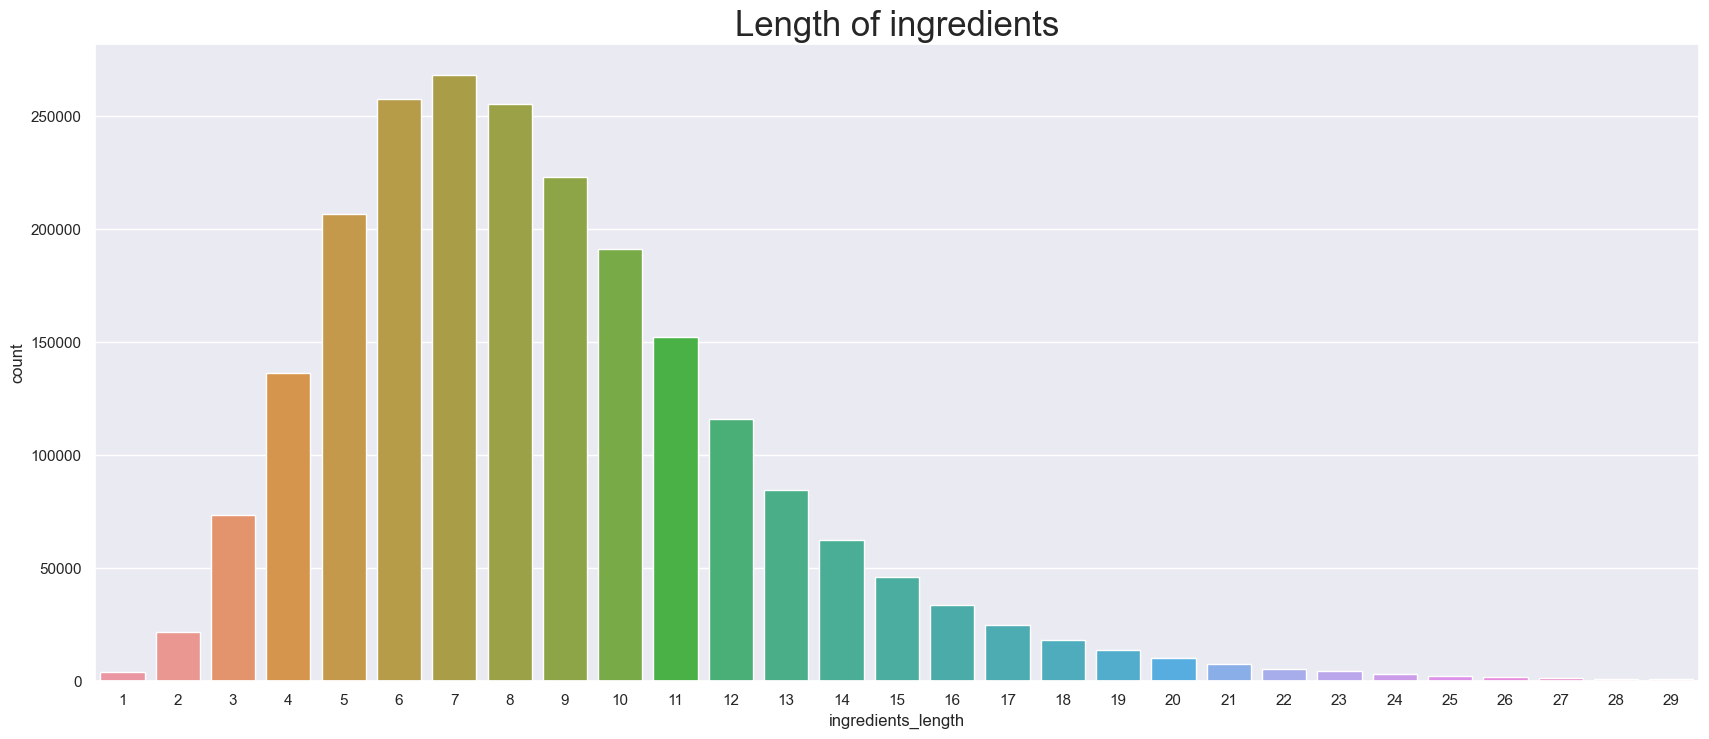

In [7]:
sns.countplot(data=df[df['ingredients_length'] < 30], x="ingredients_length").set_title('Length of ingredients', fontsize=25)

In [8]:
df['directions_length'] = df['directions'].map(lambda x: len(ast.literal_eval(x)))
df.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER,ingredients_length,directions_length
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu...",6,6
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom...",4,3
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar...",6,1
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo...",5,6
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu...",5,3


Text(0.5, 1.0, 'Length of directions')

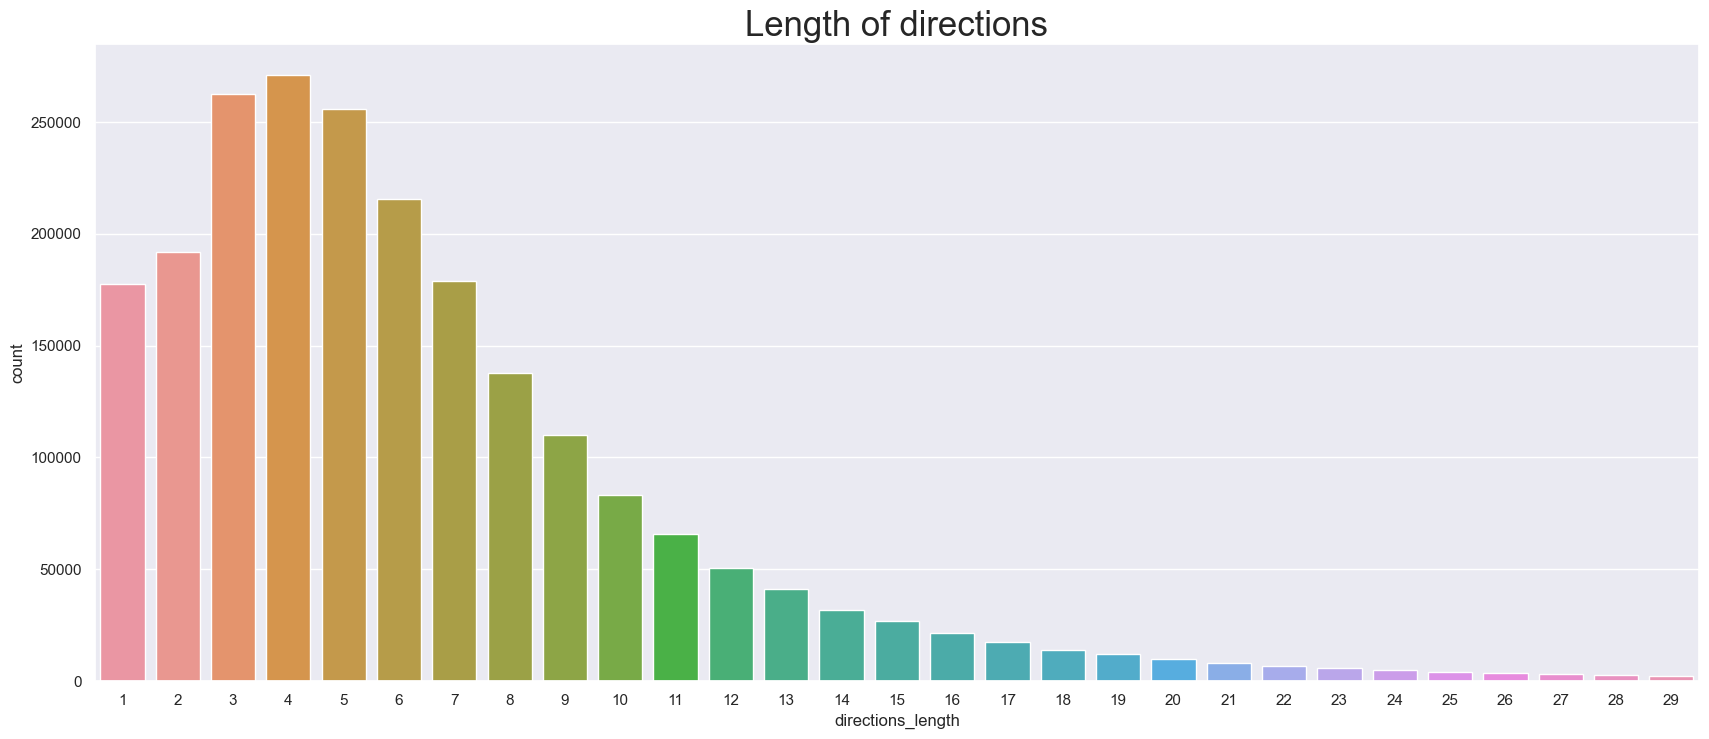

In [9]:
sns.countplot(data=df[df['directions_length'] < 30], x="directions_length").set_title('Length of directions', fontsize=25)

In [10]:
df['directions'][:5].map(lambda x: print(x))

["In a heavy 2-quart saucepan, mix brown sugar, nuts, evaporated milk and butter or margarine.", "Stir over medium heat until mixture bubbles all over top.", "Boil and stir 5 minutes more. Take off heat.", "Stir in vanilla and cereal; mix well.", "Using 2 teaspoons, drop and shape into 30 clusters on wax paper.", "Let stand until firm, about 30 minutes."]
["Place chipped beef on bottom of baking dish.", "Place chicken on top of beef.", "Mix soup and cream together; pour over chicken. Bake, uncovered, at 275\u00b0 for 3 hours."]
["In a slow cooker, combine all ingredients. Cover and cook on low for 4 hours or until heated through and cheese is melted. Stir well before serving. Yields 6 servings."]
["Boil and debone chicken.", "Put bite size pieces in average size square casserole dish.", "Pour gravy and cream of mushroom soup over chicken; level.", "Make stuffing according to instructions on box (do not make too moist).", "Put stuffing on top of chicken and gravy; level.", "Sprinkle shr

0    None
1    None
2    None
3    None
4    None
Name: directions, dtype: object

In [3]:
df['NER_array'] = df['NER'].map(lambda x: ast.literal_eval(x))

In [12]:
textList = df['NER_array'].explode().to_list()
text = ''
for word in textList:
  text += (' ' + str(word))

In [13]:
text[:50]

' brown sugar milk vanilla nuts butter bite size sh'

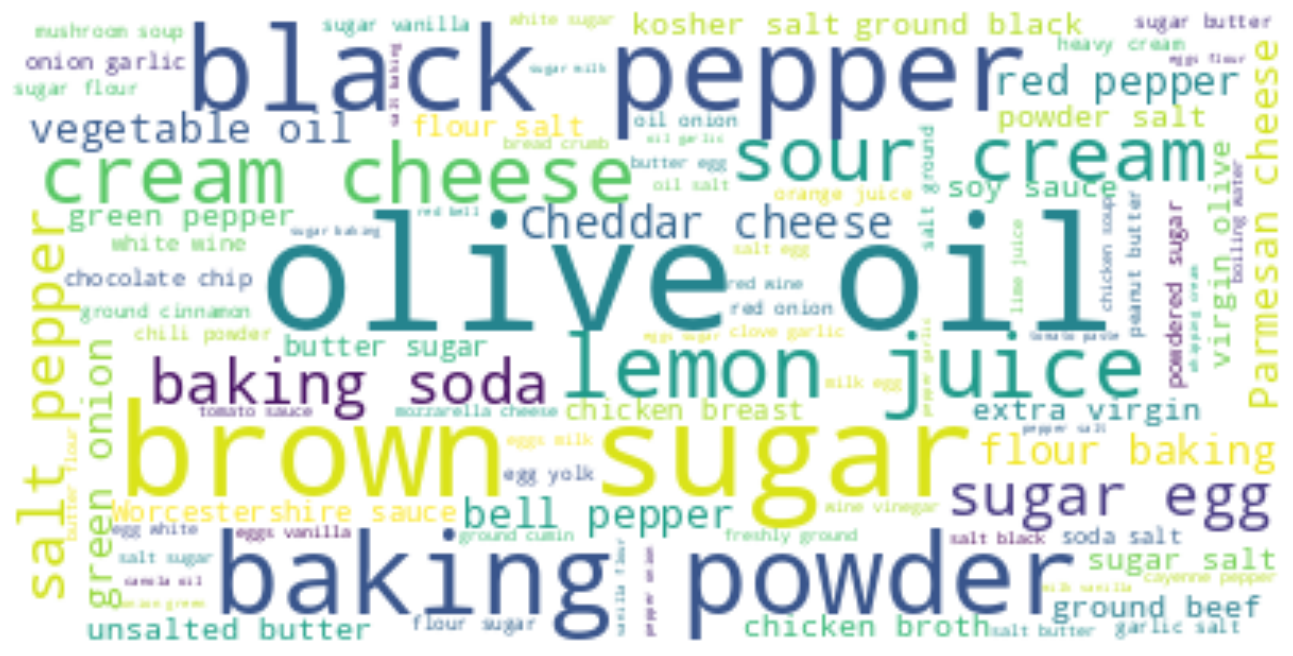

In [14]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [4]:
df['NER_sentence'] = df['NER_array'].map(lambda x: ' '.join(x))

In [5]:
countVectorizer = CountVectorizer()
tfidfVectorizer = TfidfVectorizer()

In [31]:
all_sentences_to_vector = countVectorizer.fit_transform(df['NER_sentence'][:1000])
text_to_vector_v1 = all_sentences_to_vector.toarray()[0].tolist()
text_to_vector_v2 = all_sentences_to_vector.toarray()[1].tolist()

In [32]:
x = []
for sentence1 in all_sentences_to_vector.toarray():
  for sentence2 in all_sentences_to_vector.toarray():
    similarity = 1 - distance.cosine(sentence1, sentence2)
    if similarity != 0.0 and similarity != 1.0:
      x.append(similarity)
  # print(x)

<AxesSubplot: ylabel='Count'>

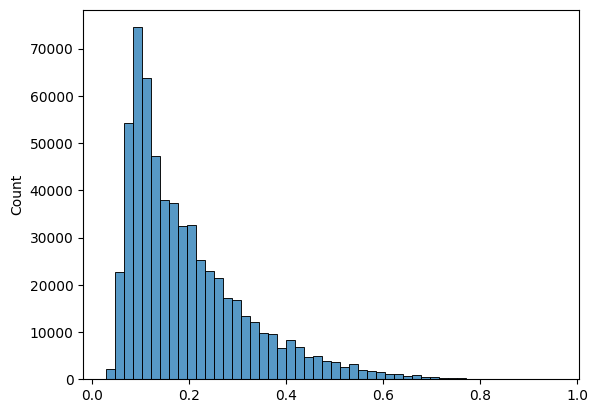

In [33]:
sns.histplot(x, bins=50)